# Letterbox movie recommendations

> Machine Learning code 

>> Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
import pkgutil 
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import ensemble 
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer---> term frequency-inverse document frequency...
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression,RidgeClassifier,PassiveAggressiveClassifier,SGDClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn import feature_selection
from sklearn.feature_selection import GenericUnivariateSelect, RFE, RFECV, SelectFdr, SelectFpr, SelectFromModel, SelectFwe, SelectKBest, SelectPercentile, SelectorMixin, SequentialFeatureSelector, VarianceThreshold
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay, DetCurveDisplay, DistanceMetric, PrecisionRecallDisplay, PredictionErrorDisplay, RocCurveDisplay, accuracy_score, adjusted_mutual_info_score, adjusted_rand_score, auc, average_precision_score, balanced_accuracy_score, brier_score_loss, calinski_harabasz_score, check_scoring, class_likelihood_ratios, classification_report, cluster, cohen_kappa_score, completeness_score, confusion_matrix, consensus_score, coverage_error, d2_absolute_error_score, d2_pinball_score, d2_tweedie_score, davies_bouldin_score, dcg_score, det_curve, euclidean_distances, explained_variance_score, f1_score, fbeta_score, fowlkes_mallows_score, get_scorer, get_scorer_names, hamming_loss, hinge_loss, homogeneity_completeness_v_measure, homogeneity_score, jaccard_score, label_ranking_average_precision_score, label_ranking_loss, log_loss, make_scorer, matthews_corrcoef, max_error, mean_absolute_error, mean_absolute_percentage_error, mean_gamma_deviance, mean_pinball_loss, mean_poisson_deviance, mean_squared_error, mean_squared_log_error, mean_tweedie_deviance, median_absolute_error, multilabel_confusion_matrix, mutual_info_score, nan_euclidean_distances, ndcg_score, normalized_mutual_info_score, pair_confusion_matrix, pairwise, pairwise_distances, pairwise_distances_argmin, pairwise_distances_argmin_min, pairwise_distances_chunked, pairwise_kernels, precision_recall_curve, precision_recall_fscore_support, precision_score, r2_score, rand_score, recall_score, roc_auc_score, roc_curve, root_mean_squared_error, root_mean_squared_log_error, silhouette_samples, silhouette_score, top_k_accuracy_score, v_measure_score, zero_one_loss


>> Load the Dataset

In [2]:
data=pd.read_csv('/Users/apple/Downloads/Letterbox Movie Classification Dataset.csv')
print(data)

      Unnamed: 0           Film_title           Director  Average_rating  \
0              0              The Fan    Eckhart Schmidt        3.570000   
1              1   Mad Max: Fury Road      George Miller        4.180000   
2              2             Suspiria      Dario Argento        3.930000   
3              3  Lost in Translation      Sofia Coppola        3.790000   
4              4                Akira    Katsuhiro Otomo        4.280000   
...          ...                  ...                ...             ...   
9995        9997      Evil Never Dies           Uli Edel        3.268535   
9996        9998   The Master Butcher           Uli Edel        3.268535   
9997        9999      Unterm Birnbaum           Uli Edel        3.268535   
9998       10000             Simulant       April Mullen        2.260000   
9999       10001             Roujin Z  Hiroyuki Kitakubo        3.590000   

                                          Genres  Runtime Original_language  \
0       

>> Handling Missing values 

In [3]:
df=pd.DataFrame(data)
df

,Unnamed: 0,Film_title,Director,Average_rating,Genres,Runtime,Original_language,Description,Studios,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0,The Fan,Eckhart Schmidt,3.570000,"['Horror', 'Drama']",92.0,German,The hero-worship that Simone has for a pop sin...,['Barbara Moorse Workshop'],12841,11032,3763,79,129,1660,714,9042
1,1,Mad Max: Fury Road,George Miller,4.180000,"['Adventure', 'Science Fiction', 'Action']",121.0,English,An apocalyptic story set in the furthest reach...,"['Warner Bros. Pictures', 'Village Roadshow Pi...",2488721,331681,927538,38000,12530,158356,511140,1682389
2,2,Suspiria,Dario Argento,3.930000,['Horror'],99.0,English,An American newcomer to a prestigious German b...,['Seda Spettacoli'],618171,220094,219548,13000,2814,53427,88628,443757
3,3,Lost in Translation,Sofia Coppola,3.790000,"['Drama', 'Comedy', 'Romance']",102.0,English,"Two lost souls visiting Tokyo -- the young, ne...","['American Zoetrope', 'Elemental Films']",1596190,254180,493248,38000,15167,155110,193717,1076949
4,4,Akira,Katsuhiro Otomo,4.280000,"['Animation', 'Action', 'Science Fiction']",124.0,Japanese,A secret military project endangers Neo-Tokyo ...,"['MBS', 'Sumitomo Corporation', 'TOHO', 'Studi...",873068,175586,341567,21000,1822,40850,196532,600721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9997,Evil Never Dies,Uli Edel,3.268535,"['TV Movie', 'Thriller', 'Horror']",205.0,English,"After his wife is brutally murdered, a policem...","['Wolper Organization', 'Warner Bros. Televisi...",108,163,10,0,7,10,5,56
9996,9998,The Master Butcher,Uli Edel,3.268535,"['TV Movie', 'Drama']",176.0,German,"After his return from World War I, there is no...","['Pakt Media', 'ARD', 'Moovie', 'ARD Degeto', ...",227,84,45,0,2,43,9,170
9997,9999,Unterm Birnbaum,Uli Edel,3.268535,"['Drama', 'TV Movie']",89.0,German,"After the death of their child, the Hradschek ...","['mecom fiction', 'ARD']",82,43,4,0,4,9,0,61
9998,10000,Simulant,April Mullen,2.260000,"['Thriller', 'Science Fiction']",95.0,English,Faye attempts to replace her newly deceased hu...,"['Wango Films', 'Myriad Pictures', 'Particular...",4239,1135,345,0,369,491,41,3274


>>checking for null values 

In [4]:
df.isnull().sum() #therefore no null values dear

Unnamed: 0           0
Film_title           0
Director             0
Average_rating       0
Genres               0
Runtime              0
Original_language    0
Description          0
Studios              0
Watches              0
List_appearances     0
Likes                0
Fans                 0
Lowest★              0
Medium★★★            0
Highest★★★★★         0
Total_ratings        0
dtype: int64

>> Label Encoding 

In [5]:
encoder=OneHotEncoder(sparse_output=False)
dir(encoder)
categorical_values=df.select_dtypes(include='object').columns
encoded_array=encoder.fit_transform(df[categorical_values])
categorical_columns=encoder.get_feature_names_out(categorical_values)
print(categorical_columns)
encoded_df=pd.DataFrame(encoded_array,columns=categorical_columns)
encoded_df
numeric_df=df.drop(columns=categorical_values)
numeric_df
new_df=pd.concat([encoded_df,numeric_df],axis=1)
df2=new_df
df2

['Film_title_#1 Fan: A Darkomentary' 'Film_title_#Alive'
 'Film_title_#Horror' ...
 "Studios_['Época Films', 'Les Productions Jacques Roitfeld', 'Fida Cinematografica']"
 "Studios_['Época Films', 'Talía Films', 'Selenia Cinematografica', 'Les Films Corona']"
 "Studios_['영화사 장춘', 'Opus Pictures', 'Trinity Pictures']"]


,Film_title_#1 Fan: A Darkomentary,Film_title_#Alive,Film_title_#Horror,Film_title_#realityhigh,Film_title_(500) Days of Summer,Film_title_+1,Film_title_...And God Created Woman,Film_title_1/2 Man,Film_title_10,Film_title_10 Cloverfield Lane,...,Average_rating,Runtime,Watches,List_appearances,Likes,Fans,Lowest★,Medium★★★,Highest★★★★★,Total_ratings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.570000,92.0,12841,11032,3763,79,129,1660,714,9042
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.180000,121.0,2488721,331681,927538,38000,12530,158356,511140,1682389
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.930000,99.0,618171,220094,219548,13000,2814,53427,88628,443757
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.790000,102.0,1596190,254180,493248,38000,15167,155110,193717,1076949
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.280000,124.0,873068,175586,341567,21000,1822,40850,196532,600721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.268535,205.0,108,163,10,0,7,10,5,56
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.268535,176.0,227,84,45,0,2,43,9,170
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.268535,89.0,82,43,4,0,4,9,0,61
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.260000,95.0,4239,1135,345,0,369,491,41,3274


# Feature Scaling or Feature Engineering 

> Feature Scaling / Feature Engineering
> > means bringing all the features to the scaled format(using min max or standardization)

> Selecting the target variable in the problem

In [6]:
print(df2.columns)

Index(['Film_title_#1 Fan: A Darkomentary', 'Film_title_#Alive',
       'Film_title_#Horror', 'Film_title_#realityhigh',
       'Film_title_(500) Days of Summer', 'Film_title_+1',
       'Film_title_...And God Created Woman', 'Film_title_1/2 Man',
       'Film_title_10', 'Film_title_10 Cloverfield Lane',
       ...
       'Average_rating', 'Runtime', 'Watches', 'List_appearances', 'Likes',
       'Fans', 'Lowest★', 'Medium★★★', 'Highest★★★★★', 'Total_ratings'],
      dtype='object', length=34871)


>> Likes(Based on)

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Enum', 'ExitStack', 'Figure', 'FigureBase', 'FigureCanvasBase', 'FigureManagerBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'Text', 'TickHelper', 'Widget', '_REPL_DISPLAYHOOK', '_ReplDisplayHook', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_draw_if_interactive', '_backend_mod', '_copy_docstring_and_deprecators', '_docstring', '_draw_all_if_interactive', '_get_backend_mod', '_get_pyplot_commands', '_get_required_interactive_framework', '_interactive_bk', 

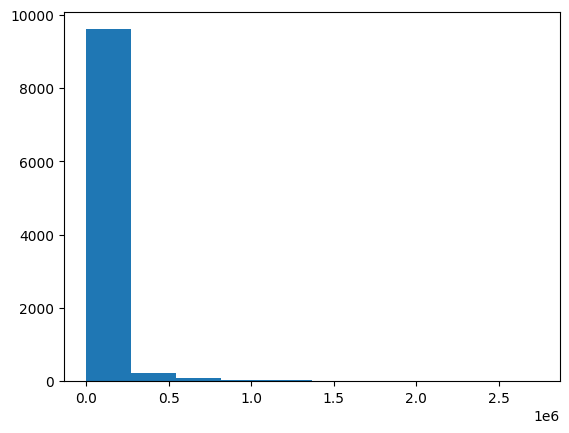

In [7]:
target1=df2['Likes']
import matplotlib.pyplot as plt
print(dir(plt))
#plt.hist?
plt.hist(x=target1)
x=df2.drop(columns='Likes')
y=df2['Likes']
print("x:",x)
print("y:",y)

> Model Training

>> Binary_classification

In [11]:
print(x)
print(y)

      Film_title_#1 Fan: A Darkomentary  Film_title_#Alive  \
0                                   0.0                0.0   
1                                   0.0                0.0   
2                                   0.0                0.0   
3                                   0.0                0.0   
4                                   0.0                0.0   
...                                 ...                ...   
9995                                0.0                0.0   
9996                                0.0                0.0   
9997                                0.0                0.0   
9998                                0.0                0.0   
9999                                0.0                0.0   

      Film_title_#Horror  Film_title_#realityhigh  \
0                    0.0                      0.0   
1                    0.0                      0.0   
2                    0.0                      0.0   
3                    0.0                   

In [12]:
# steps to follow ????

>> load the dataset
>>> Initial Exploratory data analysis ()
>>>> Data Cleaning
>>>>> Encode Categorical Features
>>>>>> Scale/Normalize Numerical Features
>>>>>>> 